<a href="https://colab.research.google.com/github/shreshthkapai/Pizza-Steak-Classification-model/blob/main/pizza_steak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
#Getting the sample data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
#unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close() 

--2022-08-17 08:58:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   190MB/s    in 0.5s    

2022-08-17 08:58:34 (190 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
#inspecting the data
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

In [6]:
import os
for dirpaths, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpaths}'")

There are 2 directories and 0 images in 'pizza_steak'
There are 2 directories and 0 images in 'pizza_steak/test'
There are 0 directories and 250 images in 'pizza_steak/test/steak'
There are 0 directories and 250 images in 'pizza_steak/test/pizza'
There are 2 directories and 0 images in 'pizza_steak/train'
There are 0 directories and 750 images in 'pizza_steak/train/steak'
There are 0 directories and 750 images in 'pizza_steak/train/pizza'


In [ ]:
!ls -la pizza_steak

In [ ]:
#another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

In [ ]:
# To visualize our images, we need to get the class names programmatically
import pathlib
import numpy as np
data_dir =  pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(data_dir)
print(class_names)

In [10]:
#visualizing our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 

def view_random_image(target_dir, target_class):
  #Setup the target directory(view images from here)
  target_folder = target_dir + target_class
  #Getting a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  #Reading the image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image Shape: {img.shape}") #shows the shape of the image
  return img

In [ ]:
#Viewing a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/", target_class= "steak")

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#setting seed
tf.random.set_seed(42)

#pre processing data (normalizing it)
pre_processed_train_data = ImageDataGenerator(rescale = 1/255.)
pre_processed_validation_data = ImageDataGenerator(rescale = 1/255.)

#setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches
train_data = pre_processed_train_data.flow_from_directory(directory = train_dir,
                                                          batch_size = 32,
                                                          target_size = (224, 224),
                                                          class_mode = "binary",
                                                          seed = 42)

validation_data = pre_processed_validation_data.flow_from_directory(directory = test_dir,
                                                                    batch_size = 32,
                                                                    target_size = (224, 224),
                                                                    class_mode = "binary",
                                                                    seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")  

In [17]:
import pandas as pd

In [ ]:
pd.DataFrame(history.history).plot(figsize = (10, 7))

In [84]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label = "training_loss")
    plt.plot(epochs, val_loss, label = "val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label = "training_accuracy")
    plt.plot(epochs, val_accuracy, label = "val_accuracy")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()


In [23]:
# When the training loss is decreasing and the validation loss is increasing it means that the model is overfitting
# reducing over-fitting is also known as regularization

In [28]:
# Create ImageDataGenerator training instance with data augmentation
train_data_augmented_generator = ImageDataGenerator(rescale = 1/255.,
                                          rotation_range = 0.2,
                                          shear_range = 0.2,
                                          zoom_range = 0.2,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.3,
                                          horizontal_flip = True)

# Create ImageDataGenerator without data augmentation for train data
non_augmented_train_data_generator = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data augmentation for test data
non_augmented_test_data_generator = ImageDataGenerator(rescale = 1/255.)

In [88]:
print(train_data)

In [30]:
print("Augmented training data")
augmented_train_data = train_data_augmented_generator.flow_from_directory(train_dir,
                                                                          target_size = (224, 224),
                                                                          batch_size = 32,
                                                                          class_mode = "binary",
                                                                          shuffle = False)

print("Non Augmented training data")
non_augmented_train_data = non_augmented_train_data_generator.flow_from_directory(train_dir,
                                                                                  target_size = (224, 224),
                                                                                  batch_size = 32,
                                                                                  class_mode = "binary",
                                                                                  shuffle = False)

print("Non Augmented test data")
non_augmented_test_data = non_augmented_test_data_generator.flow_from_directory(test_dir,
                                                                                target_size = (224, 224),
                                                                                batch_size = 32,
                                                                                class_mode = "binary",
                                                                                shuffle = False)

Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented test data
Found 500 images belonging to 2 classes.


In [31]:
#get sample data batches
images, labels = non_augmented_train_data.next()
augmented_image, augmented_image_lables = augmented_train_data.next()

In [ ]:
random_number = random.randint(0, 32)
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_image[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [34]:
augmented_train_data_shuffled = train_data_augmented_generator.flow_from_directory(train_dir, target_size = (224, 224), class_mode = "binary", shuffle = True)

Found 1500 images belonging to 2 classes.


In [87]:
tf.random.set_seed(42)
model_1 = Sequential([Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
                      MaxPool2D(pool_size = 2),
                      Conv2D(10, 3, activation = "relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation = "relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation = "sigmoid")
    ])

model_1.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

history = model_1.fit(augmented_train_data_shuffled, epochs = 5, steps_per_epoch = len(augmented_train_data_shuffled), validation_data = validation_data, validation_steps = len(validation_data))

Epoch 1/5
47/47 [==============================] - 24s 510ms/step - loss: 0.6453 - accuracy: 0.6113 - val_loss: 0.5136 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 23s 482ms/step - loss: 0.5376 - accuracy: 0.7320 - val_loss: 0.3671 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 23s 483ms/step - loss: 0.4946 - accuracy: 0.7627 - val_loss: 0.3472 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 23s 483ms/step - loss: 0.4885 - accuracy: 0.7540 - val_loss: 0.3677 - val_accuracy: 0.8300
Epoch 5/5
47/47 [==============================] - 23s 480ms/step - loss: 0.4644 - accuracy: 0.7967 - val_loss: 0.3179 - val_accuracy: 0.8620


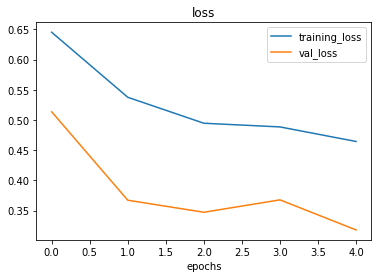

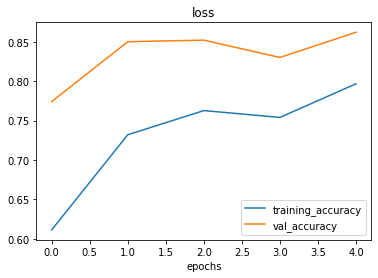

In [89]:
plot_loss_curves(history)

In [63]:
# Create a function to import a custom image and resie it to be able to use it with our 
def load_and_prep_image(filename, img_size = (224)):
  """
  Reads an image from the filename, turns it into a tensor and reshapes it
  """ 
  #default img size 
  img_size = (224)

  #Read the image
  img = tf.io.read_file(filename)

  #Decode the image into a tensor
  img = tf.image.decode_image(img)

  #Resize the image 
  img = tf.image.resize(img, size = [img_size, img_size])

  #Rescale the image
  img = img/255.

  return img

In [80]:
def predict_and_plot_img(filename):

  #Import target image and prep it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model_6.predict(tf.expand_dims(img, axis = 0))

  #Get the predicted class
  class_name = class_names[int(tf.round(pred))]

  #plot the image and image class
  plt.imshow(img)
  plt.title(f"Prediction: {class_name}")
  plt.axis(False)

In [ ]:
pred1 = predict_and_plot_img("/pizza_2.jpg")